In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [3]:
# preview the data
train.head()
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


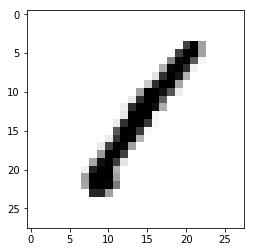

In [4]:
#display the first number
myNumber = train.iloc[0,1:] #row slice
#print(myNumber)
myNumber=myNumber.values.reshape((28,28))
plt.imshow(myNumber, cmap=plt.cm.binary)
plt.show()

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

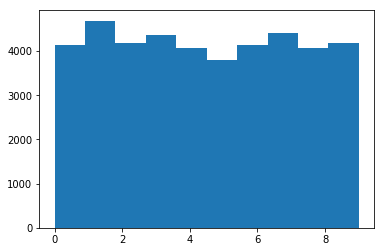

In [5]:
#Histogram showing amount of numbers
plt.hist(train['label'])

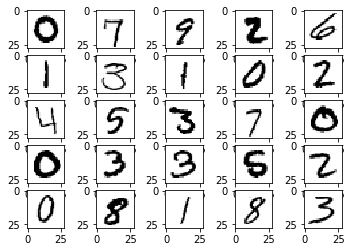

In [6]:
#Displaying multiple numbers
import math

f, ax = plt.subplots(5, 5)
for i in range(1,26):
    data = train.iloc[i,1:785].values #this is the first number
    nrows, ncols = 28, 28
    grid = data.reshape(nrows, ncols)
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid, cmap=plt.cm.binary)


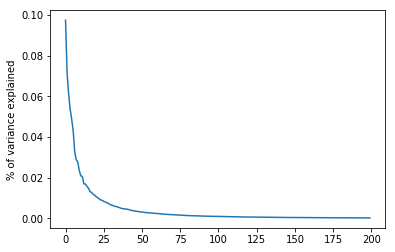

In [7]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=200) #Finds first 200 principle components
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

#pca with fewer components
pca = decomposition.PCA(n_components=50) 
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

PCtest = pd.DataFrame(pca.transform(test))

In [8]:
from sklearn.neural_network import MLPClassifier

y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
from sklearn import  metrics

predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2200
           1       0.98      0.99      0.98      2418
           2       0.96      0.96      0.96      2167
           3       0.96      0.94      0.95      2270
           4       0.96      0.96      0.96      2101
           5       0.94      0.95      0.95      2001
           6       0.97      0.98      0.97      2155
           7       0.96      0.97      0.97      2331
           8       0.9

In [10]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)